A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [1]:
import sys
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import datasets
from xgboost import XGBRegressor, XGBClassifier
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVR, LinearSVC
sys.path.append('C:\\DATA_SCIENCE')
from sklearn import linear_model
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, RobustScaler, Normalizer, PolynomialFeatures, MinMaxScaler
from LIBRARY.Libreria_Folders_DVG import *
from LIBRARY.Libreria_Pandas_DVG import *
from LIBRARY.Libreria_ML_DVG import *
from LIBRARY.Libreria_Maths_DVG import *
from LIBRARY.Libreria_Graphs_DVG import *

In [2]:
import pandas as pd
df = pd.read_csv("../data/Euro_2012_stats_TEAM.csv")

df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [3]:
df.dtypes

Team                           object
Goals                           int64
Shots on target                 int64
Shots off target                int64
Shooting Accuracy              object
% Goals-to-shots               object
Total shots (inc. Blocked)      int64
Hit Woodwork                    int64
Penalty goals                   int64
Penalties not scored            int64
Headed goals                    int64
Passes                          int64
Passes completed                int64
Passing Accuracy               object
Touches                         int64
Crosses                         int64
Dribbles                        int64
Corners Taken                   int64
Tackles                         int64
Clearances                      int64
Interceptions                   int64
Clearances off line           float64
Clean Sheets                    int64
Blocks                          int64
Goals conceded                  int64
Saves made                      int64
Saves-to-sho

In [4]:
lista = df.select_dtypes('object').columns
for x in lista:
 str_cleaner(df, x, '%')

In [5]:
lista2 = lista.drop('Team')
for x in lista2:
    df[x] = df[x].apply(pd.to_numeric)

## 1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

In [6]:
corrFilter(df, 0.85)          #most correlated columns

Dribbles                    Passes                        0.850185
Subs off                    Touches                       0.852144
Touches                     Corners Taken                 0.853879
Yellow Cards                Fouls Conceded                0.856143
Subs off                    Offsides                      0.856638
Total shots (inc. Blocked)  Passes completed              0.864279
                            Corners Taken                 0.864856
Touches                     Dribbles                      0.872556
Passes                      Total shots (inc. Blocked)    0.875698
Touches                     Tackles                       0.880499
Shots on target             Total shots (inc. Blocked)    0.886090
Shots off target            Total shots (inc. Blocked)    0.887032
Touches                     Total shots (inc. Blocked)    0.894708
Subs off                    Fouls Won                     0.907719
Passes completed            Shots on target               0.92

## 2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles?

In [7]:
corr_comparer(df, 'Goals')          #here we see a 0,52 correlation between Goals and Shootin Accuracy

Goals                         1.000000
Passes                        0.838497
Touches                       0.837760
Passes completed              0.830062
Shots on target               0.804193
Tackles                       0.796830
Clean Sheets                  0.792559
Penalty goals                 0.730437
Subs on                       0.727830
Subs off                      0.727830
Offsides                      0.703043
Corners Taken                 0.697240
Dribbles                      0.693998
Crosses                       0.667097
Fouls Won                     0.663876
Total shots (inc. Blocked)    0.650109
% Goals-to-shots              0.533239
Shooting Accuracy             0.521210
Fouls Conceded                0.483833
Interceptions                 0.482441
Passing Accuracy              0.438994
Shots off target              0.403821
Saves-to-shots ratio          0.394424
Headed goals                  0.349330
Yellow Cards                  0.337709
Clearances               

In [8]:
X = np.array(df['Shooting Accuracy']).reshape(-1, 1)
y = df['Goals']

In [9]:
train_errors, val_errors = [], []
def plot_learning_curves(model, X, Y):
    # 80% de Train
    # 20% de Test
    X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2)
    
    for m in range(1, len(X_train)//4):
        x = X_train[:m]
        y = y_train[:m]
        model.fit(x, y)

        y_train_predict = model.predict(x)
        y_val_predict = model.predict(X_val)

        train_errors.append(mean_squared_error(y, y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        

    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    plt.title('Lineal Regression')

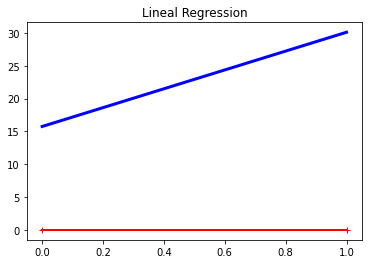

In [10]:
lr = LinearRegression()
plot_learning_curves(model=lr, X=X, Y=y)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
degree = 2
polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1), y_train)

In [12]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)

LinearRegression()

In [13]:
y_pred = lin_reg_model.predict(X_poly)

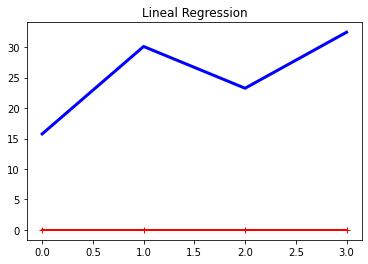

In [14]:
plot_learning_curves(model=lin_reg_model, X=X, Y=y)

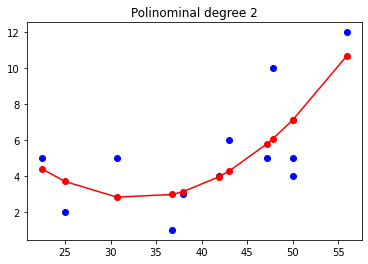

In [15]:
X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
plt.scatter(X_train_to_show, y_train_to_show, color='b')
X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
plt.plot(X_train_to_show, y_pred, color='red')
plt.scatter(X_train_to_show, y_pred, color='red')
plt.title("Polinominal degree " + str(degree))
plt.show()

In [16]:
sv = LinearSVR()

In [17]:
sv.fit(X_train, y_train)

LinearSVR()

In [18]:
sv.score(X_val, y_val)

-1.2891630083560375

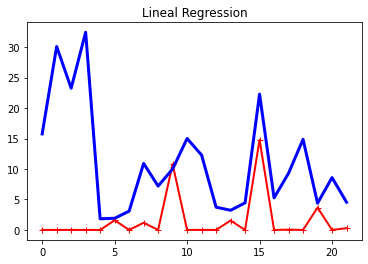

In [50]:
plot_learning_curves(model=sv, X=X, Y=y)

## 3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

% de goles por disparo: 40%
Total shots (inc. Blocked): 102
Corners Taken: 5
Passes: 82
Dribbles: 23

In [34]:
X = np.array(df[["% Goals-to-shots", "Total shots (inc. Blocked)", "Corners Taken", "Passes", "Dribbles"]])
y = np.array(df['Goals'])

In [35]:
new_team = pd.DataFrame({'% Goals-to-shots': 40, 'Total shots (inc. Blocked)': 102, 'Corners Taken': 5, 'Passes': 82, "Dribbles":23}, index=[0])

new_team

,% Goals-to-shots,Total shots (inc. Blocked),Corners Taken,Passes,Dribbles
0,40,102,5,82,23


In [39]:
lgr = LogisticRegression()
rdf = RandomForestClassifier()
svc = LinearSVC()

In [40]:
lgr.fit(X, y)
rdf.fit(X, y)
svc.fit(X, y)

LinearSVC()

In [42]:
lgr.predict(new_team), rdf.predict(new_team), svc.predict(new_team)      #4 goles para todos los modelos

(array([4], dtype=int8), array([4], dtype=int8), array([4], dtype=int8))